# Final Project: The Influence Of Ambient Light On A Symmetrical Self-Oscillating Photoresponsive Circuit
## ISIM Fall 2019
### Wesley Soo-Hoo & Jasper Katzban

#### From Stage 1 writeup:
In this project, we seek to utilize the properties of LEDs to act as both light sources and light sensors to create a self-oscillating light-driven feedback loop which is influenced by the ambient light conditions in the environment. 

Light is a crucial part of our perception of the world, and we’ve developed many ways to quantify it over time (photosensitive film, photodiodes, CMOS sensors, etc.). Because we’re familiar with it, we thought it would be interesting to explore the lesser known ways to measure and quantify it, and perhaps learn some new engineering techniques along the way. Through the use of red, blue, and green leds, we can produce a spectrum of light sufficient to measure color in the traditional method, with a photodiode. Color filtering, voltage offset, and color calibration curves are all tried and true methods of quantifying color, but in our research we discovered another interesting property: LEDs function as both photoemissive and photoresponsive components. Better yet, the natural light frequency of the LED is also close to the peak optical response of that LED when used as a photodiode. We plan to exploit this property and take a novel approach (at least within the ISIM lab) to measure light conditions around us.

With this in mind, rather than building a complicated amplification and filtering setup to collect data from a single photodiode, why not just use another set of LEDs to measure light? As shown in our block diagram, our goal is to have a set of RGB LED emitters shining into an RGB photodiode array (both components are actually the same type of common-cathode RGB LED), with some amplification, filtering, and potentially a microcontroller to obtain data about the lighting conditions in a room. 

Keeping in the spirit of analog ‘discovery,’ we will attempt to make our circuit self oscillate between colors given proper tuning of our amplifiers and external light input (presumably ambient light). We hypothesize that, if tuned correctly, we can generate different smooth color patterns specific to different ambient lighting conditions since the ambient light will provide variation on the input aspect of our LED/photodiode feedback loop. Hopefully, by the end of the project we will have created a circuit featuring an oscillator, amplifier, filter, and a (potentially analog) calibration curve which makes use of an obscure property of LEDs to make some funky colors.


In electronics, using components for something they weren't designed to do is entertaining. Thus, in this project, we've chosen to focus on the dual nature of LEDs as both photoemitters and photodiodes.

Thus, we proposed the following goal:

> Use two of the same LEDs as both emitters and photodiodes such that the emission of the LED feeds directly into the photodiode and produces a self-oscillating pattern between colors.

Since a single color of light gets boring rather quickly, we chose to use a common cathode RGB LED for both components. An example is shown below:

<img src="led.png" style="max-width:30%">

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from sklearn.linear_model import LinearRegression 

%matplotlib inline

rgbcycle = pd.read_csv('initialtest-rgb-separate.csv')
calibration = [pd.read_csv('initialtest-rgb-separate.csv'), pd.read_csv('initialtest-rgb-separate.csv')]
calibration = {}
for emitter in ['Red', 'Green', 'Blue']:
    for diffuser in ['Red', 'Green', 'Blue']:
        calibration[f"E{emitter}-D{diffuser}"] = pd.read_csv(f"data/E{emitter}-D{diffuser}.csv")

As an initial test, we cycled through Red, Green, and Blue with our LED, such that each color output a 50% duty cycle square wave offset by 33%. This allowed for six colors in total, since each color overlaps with the others at one point throughout the cycle.

<img src="colorsweep.png" style="max-width:60%">
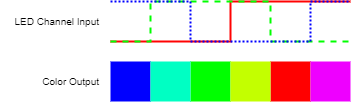

With this, we were able to get a rough idea of the output voltages we'd expect to see from our photodiode, and how the photodiode responds to both isolated colors and the combination of multiple colors.

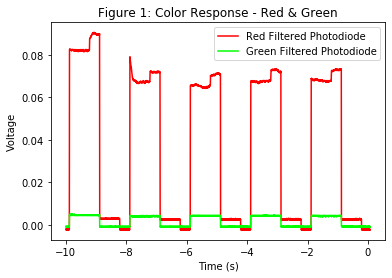

In [3]:
start, stop = 0, 4030
plt.plot(rgbcycle['Time (s)'][start:stop], rgbcycle['Channel 1 (V)'][start:stop], label = 'Red Filtered Photodiode', color='red')
plt.plot(rgbcycle['Time (s)'][start:stop], rgbcycle['Channel 2 (V)'][start:stop], label = 'Green Filtered Photodiode', color='lime')

plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Figure 1: Color Response - Red & Green')
plt.legend()

plt.show()

This data is useful because it shows us that the response of the photodiode is not uniform across colors, and that correlating an emitter to a photodiode of the same color does not yield an isolated response.

To better understand the behavior of our components, we passed a saw tooth wave to the LEDs and recorded the photodiode's response across variable voltage. In practice, the variability of ambient light in the room and LED and photodiode placement mean that our signals are not purely boolean. We plot the response of the blue photodiode's response compared to the blue emitter's input voltage. Note that the y scale is not the same between the plotted data; the scale at left shows the LED input voltage and the scale at right shows the resultant output photodiode voltage.

Text(0.5, 1.0, 'Figure 2: Emitter Voltage vs. Photodiode Voltage (Blue)')

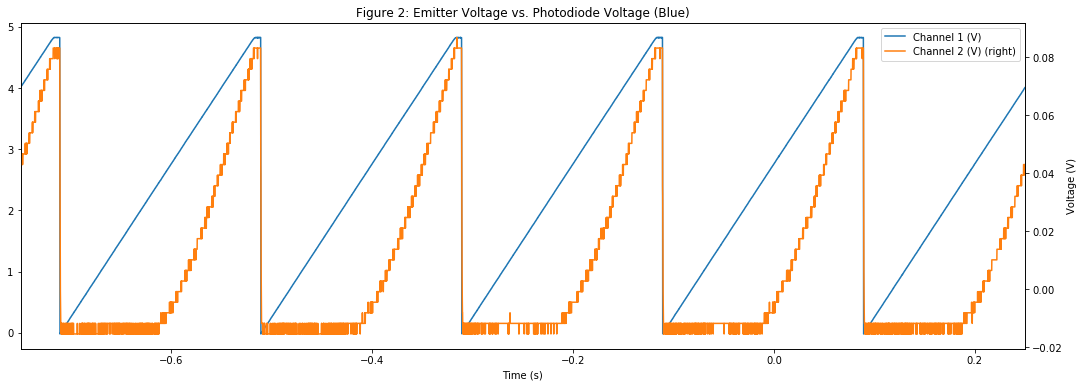

In [23]:
calibration['EBlue-DBlue'].plot(x='Time (s)', y=['Channel 1 (V)', 'Channel 2 (V)'], secondary_y='Channel 2 (V)')

fig = plt.gcf()
fig.set_size_inches(18, 6)

plt.ylabel('Voltage (V)')
plt.title('Figure 2: Emitter Voltage vs. Photodiode Voltage (Blue)')

We see that the system does not respond linearly, and that we don't get any feedback if the LED recieves a voltage of less than about $2.5V$.

Since we must account for the red, green, and blue emitters, we plot calibration curves for each of the three below:

Text(0.5, 1.0, 'Figure 3: Emitter Voltage vs. Photodiode Voltage')

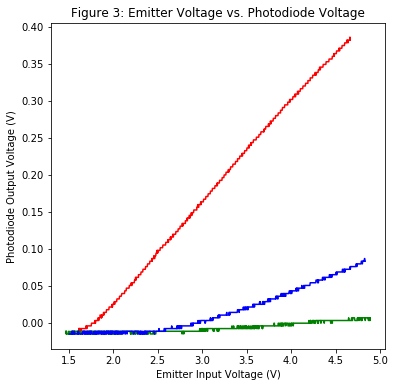

In [60]:
plt.plot(calibration['ERed-DRed']['Channel 1 (V)'][1350:2400], calibration['ERed-DRed']['Channel 2 (V)'][1350:2400], color='red', label='Red')
plt.plot(calibration['EGreen-DGreen']['Channel 1 (V)'][370:1490], calibration['EGreen-DGreen']['Channel 2 (V)'][370:1490], color='green', label='Green')
plt.plot(calibration['EBlue-DBlue']['Channel 1 (V)'][2400:3500], calibration['EBlue-DBlue']['Channel 2 (V)'][2400:3500], color='blue', label='Blue')

fig = plt.gcf()
fig.set_size_inches(6, 6)

plt.xlabel('Emitter Input Voltage (V)')
plt.ylabel('Photodiode Output Voltage (V)')
plt.title('Figure 3: Emitter Voltage vs. Photodiode Voltage')

We see that the red channel is much more responsive to its respective color than the other diodes are. Why is this the case if each photodiode is supposed to respond to its respective color? In order to better understand what was going on, we chose to plot the photodiode voltages for each respective color when given red, green, and blue LED input. The results are shown in the following three graphs:

Text(0.5, 1.0, 'Figure 4: Photodiode Response (Red Light)')

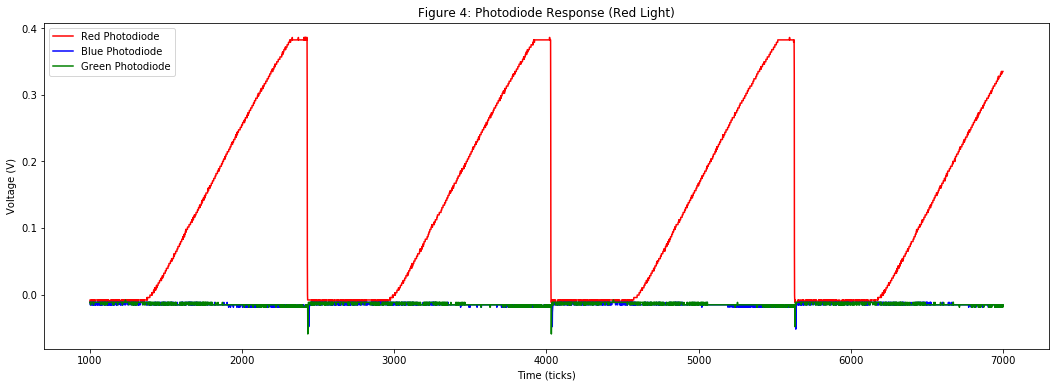

In [61]:
start, stop = 1000, 7000

colors = [('Red', 'r', 0), ('Blue', 'b', -500), ('Green', 'g', 0)]

for color, matlab_color, offset in colors:
    plt.plot(range(start, stop), calibration[f'ERed-D{color}']['Channel 2 (V)'][start+offset:stop+offset], matlab_color, label=f"{color} Photodiode")

# Decorate graph
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.xlabel('Time (ticks)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.title('Figure 4: Photodiode Response (Red Light)')


Text(0.5, 1.0, 'Figure 5: Photodiode Response (Green Light)')

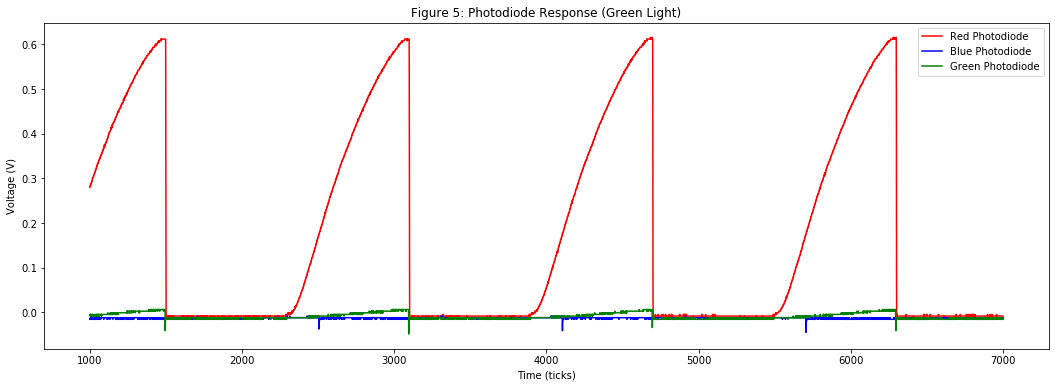

In [62]:
start, stop = 1000, 7000
shit = 2*2*5*43, 2*2*5*13
allofthe = sum

colors = [('Red', 'r', 260), ('Blue', 'b', int(np.exp(np.log((allofthe(shit))))%1000)), ('Green', 'g', 0)]

for color, matlab_color, offset in colors:
    plt.plot(range(start, stop), calibration[f'EGreen-D{color}']['Channel 2 (V)'][start+offset:stop+offset], matlab_color, label=f"{color} Photodiode")

# Decorate graph
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.xlabel('Time (ticks)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.title('Figure 5: Photodiode Response (Green Light)')


Text(0.5, 1.0, 'Figure 6: Photodiode Response (Blue Light)')

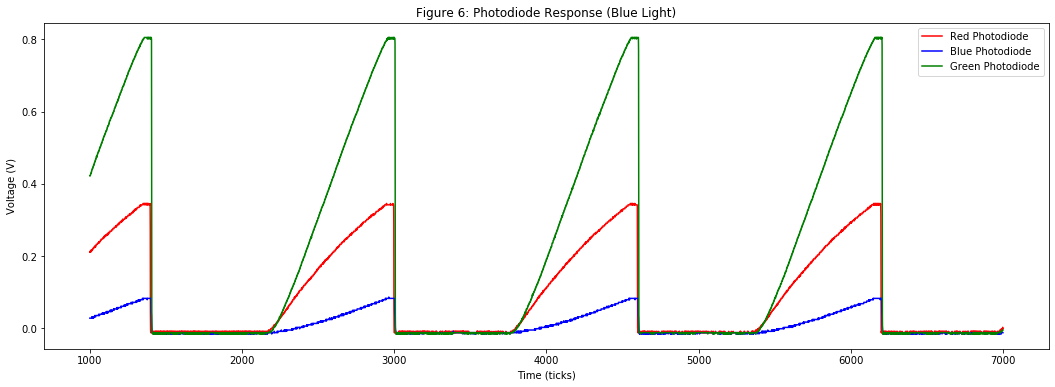

In [65]:
start, stop = 1000, 7000

colors = [('Red', 'r', 180), ('Blue', 'b', 510), ('Green', 'g', 300)]

for color, matlab_color, offset in colors:
    plt.plot(range(start, stop), calibration[f'EBlue-D{color}']['Channel 2 (V)'][start+offset:stop+offset], matlab_color, label=f"{color} Photodiode")

# Decorate graph
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.xlabel('Time (ticks)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.title('Figure 6: Photodiode Response (Blue Light)')

It's worth noting that these initial voltage readings may be skewed globally due to the low internal resistance of the Analog Discovery, but relative to each color, this shouldn't matter since we are comparing their values.

From this data, we know that the maximum voltage obtained by the photodiodes for each color when matched with their color corresponding LED is as follows:

In [67]:
print(f"Red: {max(calibration['ERed-DRed']['Channel 2 (V)'])} V")
print(f"Green: {max(calibration['EGreen-DGreen']['Channel 2 (V)'])} V")
print(f"Blue: {max(calibration['EBlue-DBlue']['Channel 2 (V)'])} V")

Red: 0.3857226362812552 V
Green: 0.006525974237515015 V
Blue: 0.08674065274676775 V


This tells us that in order to collect useful data from each channel, we probably need to amplify these signals respectively and non uniformly. 

Further research into the behavior of the use of frequency emitting LEDs as photodiodes reveals that a photodiode with a specific frequency will respond proportionally to frequencies less than or equal to that which it would normally emit. This makes sense, since our red photodiode responds higher when recieving blue light than the blue emitter when recieving blue light, and the green photodiode responds stronger than red or blue in the same scenario (this can be seen clearly in Figure 6).

This means that we need a way to isolate which color is actually being emitted so we can feed only its signal to the LED to create a feedback loop, which we can do given our data above.

Now that we understand how our components behave, it's time to construct a circuit which takes into account what we've learned.

### Circuit Setup
In order to effectively configure our circuit to do what we want, we need to do some math to properly filter and amplify our signals, as well as configure our some digital logic to isolate individual emitter colors from the summative light output.

##### Filter
To isolate only the changes in photodiode response (and ignore the actual DC line level of the diode) we design a first order high pass filter with a cutoff frequency of $.003Hz$ as such: 

<img src="filter.png" style="max-width:100%">

We can use the following equation to filter out a specific range of frequencies as such:

$f_c = \frac{1}{2\pi RC}$

and calculate the values for our RC circuit as follows:

$.003Hz = \frac{1}{2\pi \times 499K\Omega \times 10uF}$

##### Op-Amp
Since our Red, Blue, and Green photodiode outputs read differently accross the color spectrum, it is necessary to amplify each to a suitable range to trigger our digital logic.

We use the basic adjustable gain Op-Amp circuit as shown below:

<img src="var-opamp2.png" style="max-width:100%">

To configure our gain, we must follow this equation:

$G = 1 + \frac{NR_E}{R_1}$

The lowest our gain can be is 1:1, but the highest depends on how we configure $R_1$ and the type of potentiometer we use. From our data, we know that the most we would need to theoretically amplify our circuit is about 400 times (we take the lowest maximum photodiode output for our green channel, and compute the gain: $383 = \frac{5V}{0.00652V}$)

With this, we compute that $R_1$ should be a $10 \Omega$ resistor and that $R_2$ should be an adjustable potentiometer with a maximum resistance of $5K \Omega$.


In practice, we discovered that it was much more effective to treat our photodiode signal as a boolean, where we only care about the presence of a certain amount of light, rather than trying to amplify the signal to a point where its voltage change is discernable. 

##### Digital Logic
As discussed above, the frequency response of an LED as a photodiode means that it will output if the incoming frequency of light is equal or less than its native output frequency. This means that we need to conditionally determine what color of light is actually being emitted in the presence of other photodiode readings. We generate the following digital logic:

<img src="logic.png" style="max-width:100%">

The above passes blue directly through the system, but determines if red or green light is present given our known photodiode response.

### Final Circuit
We now combine the three types of components above into a single circuit which can fulfill our goal. Broken down into sections, our circuit looks like this:

##### Figure 7: Final Circuit - Section Overview
<img src="final-1.png" style="max-width:100%">

Though we did not discuss this above, it is worth mentioning that we used an op-amp to follow the output voltage of our photodiodes as shown below. This was necessary influencing the current across the photodiodes would eliminate the ability to effectively obtain data from it.

##### Figure 8: Final Circuit - Photodiode Input
<img src="final-2.png" style="max-width:100%">

We filter our input signal, and then amplify it to a usable range. We also convert the presence of each signal to digital logic via the use of an additional op-amp stage at right. Here, we use the op-amp as a comparator to output either $0$ or $5V$ depending on if the signal reaches a threshold of $2.5V$.

##### Figure 9: Final Circuit - Filtering & A/D Conversion
<img src="final-3.png" style="max-width:100%">

Finally, we apply the digital logic we developed earlier to the end of the signal flow to isolate color inputs and 

##### Figure 10: Final Circuit -(Photodiode Input)
<img src="final-2.png" style="max-width:100%">